<a href="https://colab.research.google.com/github/takacsanna/igy_neveld_fakt/blob/main/hazi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. házi feladat

###Függvények implementálása és kirajzolása

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def sigmoid(x):
    a = []
    for pont in x:
        a.append(1/(1+math.exp(-pont)))
    return a

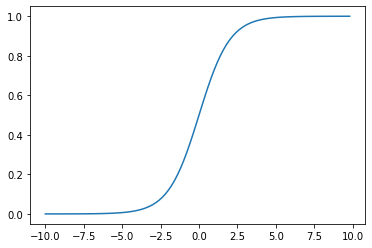

In [4]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

In [13]:
def relu(y):
    a = []
    for pont in y:
      if pont > 0:
        a.append(pont)
      else:
        a.append(0)
    return a

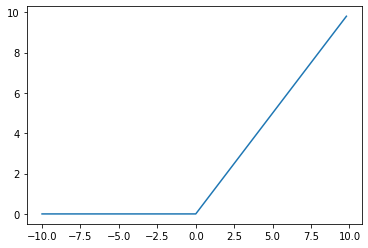

In [14]:
y = np.arange(-10., 10., 0.2)
relu_fv = relu(y)
plt.plot(y,relu_fv)
plt.show()

###Regressziós probléma

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive

In [40]:
url='https://drive.google.com/file/d/1aIsvw-wDM9ZoP-fIBYBzKnorC7GDaNZV/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.columns=["sex", "length", "diam", "height", "wweight", "sweight", "vweight", "shellw", "rings"]

In [41]:
df.head()

,sex,length,diam,height,wweight,sweight,vweight,shellw,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [42]:
df.isna().sum()

sex        0
length     0
diam       0
height     0
wweight    0
sweight    0
vweight    0
shellw     0
rings      0
dtype: int64

In [43]:
labeler = LabelEncoder()

In [45]:
labeler.fit(df.sex)

LabelEncoder()

In [46]:
df.sex = labeler.transform(df.sex)

In [47]:
df.head()

,sex,length,diam,height,wweight,sweight,vweight,shellw,rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [48]:
y_df = df.rings

In [49]:
x_df = df.copy().drop('rings', axis = 1)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, shuffle=True)

####Architektúra létrehozása

In [58]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanSquaredError

In [52]:
input = Input(shape=(x_train.shape[1]))
x= Dense(32, activation='relu')(input)
output = Dense(1, activation = 'linear')(x)

In [53]:
model = keras.Model(input, output)

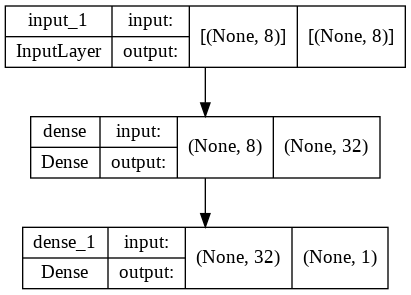

In [54]:
plot_model(model, show_shapes=True)

In [59]:
model.compile(loss='mse', metrics=['MeanSquaredError'])

In [60]:
model.fit(x=x_train, y=y_train, epochs=50)

Epoch 1/50
118/118 [==============================] - 2s 3ms/step - loss: 90.0431 - mean_squared_error: 90.0431
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 40.6727 - mean_squared_error: 40.6727
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 12.6264 - mean_squared_error: 12.6264
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 8.9042 - mean_squared_error: 8.9042
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 8.0043 - mean_squared_error: 8.0043
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 7.5056 - mean_squared_error: 7.5056
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 7.1780 - mean_squared_error: 7.1780
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 6.9308 - mean_squared_error: 6.9308
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 6.7513 - mean_squared_error: 6.7513
Epoc

In [62]:
model.predict(x_test)

array([[15.193847 ],
       [ 8.823733 ],
       [10.775577 ],
       [11.977238 ],
       [ 7.9406114],
       [14.155366 ],
       [10.707088 ],
       [12.963948 ],
       [ 7.1577663],
       [ 9.839381 ],
       [ 0.8208528],
       [10.131137 ],
       [ 9.800069 ],
       [ 8.982698 ],
       [10.013967 ],
       [ 8.864909 ],
       [10.1606   ],
       [ 9.176307 ],
       [ 9.13562  ],
       [11.293463 ],
       [10.239638 ],
       [10.488633 ],
       [ 9.327313 ],
       [14.913079 ],
       [ 9.964754 ],
       [ 6.343215 ],
       [ 9.113019 ],
       [12.229564 ],
       [13.805294 ],
       [11.038463 ],
       [16.41082  ],
       [ 7.2713795],
       [ 8.449644 ],
       [11.035434 ],
       [ 9.354665 ],
       [ 8.613499 ],
       [12.906392 ],
       [10.008046 ],
       [11.637511 ],
       [ 8.97927  ],
       [ 7.195019 ],
       [ 8.759696 ],
       [ 9.237683 ],
       [ 7.8147397],
       [10.050944 ],
       [10.768113 ],
       [ 9.157994 ],
       [ 3.95

In [63]:
model.evaluate(x=x_test, y=y_test)

14/14 [==============================] - 0s 2ms/step - loss: 4.5547 - mean_squared_error: 4.5547


[4.554690837860107, 4.554690837860107]